In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("EV.xlsx")


In [ ]:
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.isnull().sum()


,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Data Cleaning and Preparation:

In [ ]:
df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)


/tmp/ipython-input-2823866897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(df['Electric Range'].mean(), inplace=True)
/tmp/ipython-input-2823866897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df.isnull().sum()


,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Descriptive Analysis:

In [ ]:
print("Mean:", df['Electric Range'].mean())
print("Min:", df['Electric Range'].min())
print("Max:", df['Electric Range'].max())
print("Std Dev:", df['Electric Range'].std())


Mean: 58.842162077069254
Min: 0
Max: 337
Std Dev: 91.98129769422103


EV Growth Over Years:

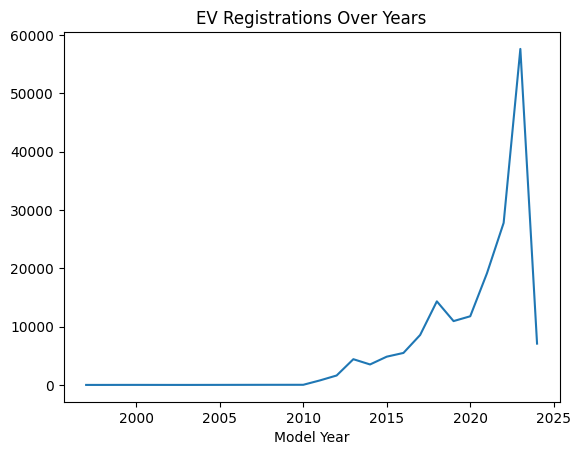

In [ ]:
ev_year = df.groupby('Model Year').size()

ev_year.plot()
plt.title("EV Registrations Over Years")
plt.show()


Electric Range vs Price:

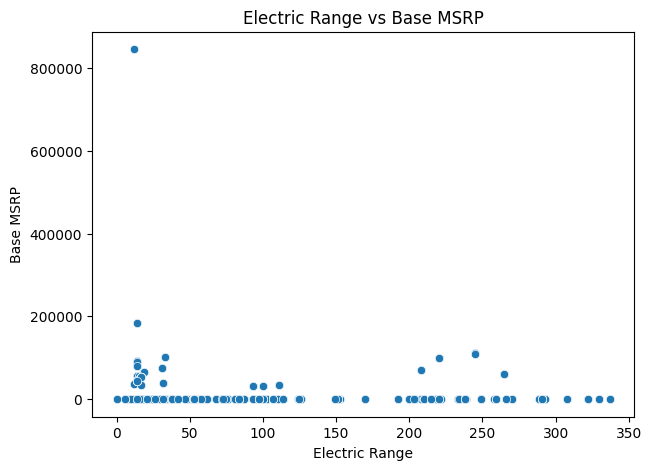

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title("Electric Range vs Base MSRP")
plt.show()


Simple Forecast:

In [ ]:
from sklearn.linear_model import LinearRegression

X = ev_year.index.values.reshape(-1,1)
y = ev_year.values

model = LinearRegression()
model.fit(X, y)

future_years = np.array([2025, 2026, 2027]).reshape(-1,1)
predicted = model.predict(future_years)

predicted


array([20721.46732401, 21686.76691126, 22652.06649851])

Geographical/Manufacturer Analysis:
Top EV Manufacturers

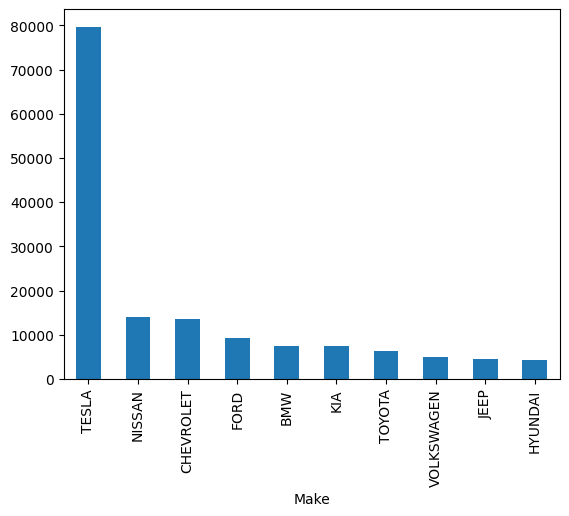

In [ ]:
df['Make'].value_counts().head(10).plot(kind='bar')
plt.show()


EV Type Distribution:

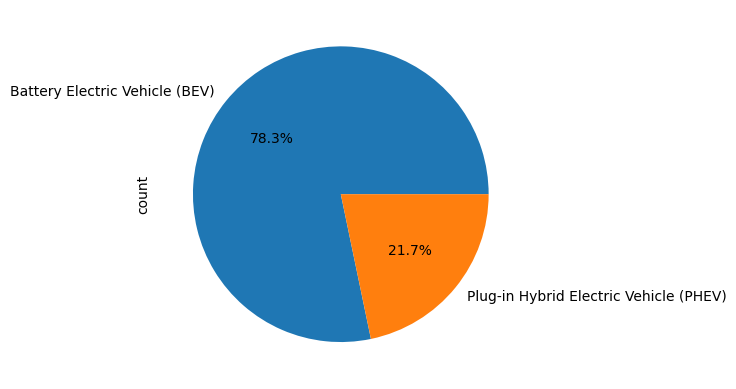

In [ ]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


Technologe/Range Analysis:

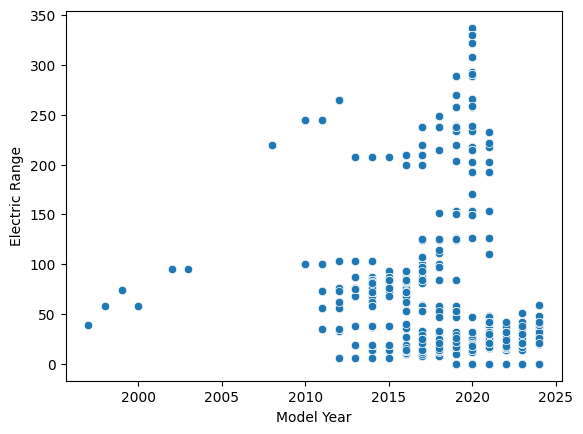

In [ ]:
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.show()


Market Size Estimation:

In [ ]:
df.shape[0]


177866